In [1]:
from simpful import *
# from simpful.fuzzy_sets import Coh_High_MF, Adh_High_MF, Adh_Low_MF - 
# - custom implementation of the functions inside the package
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coh_high(x, s_c=0.3):
    return 1 / (1 + np.exp(-s_c * x))

def adh_high(x, A_max, s_ah=0.3):
    return np.exp( ( (-x**2) / 2*((A_max*s_ah)**2) ) )

def adh_low(x, A_max, s_al=0.27):
    res = (-(x-A_max)**2) / 2*((A_max*s_al)**2)
    return np.exp(res)  

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.6.3 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



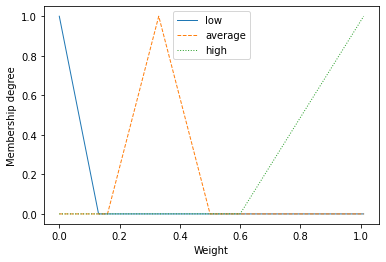

{'Weight': 0.5742990192038836}


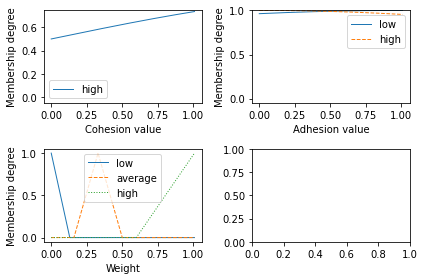

In [16]:
A_max = 1.01
a = np.arange(0, A_max, 0.01)

FS = FuzzySystem()

#Define the fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Coh_High_MF(A_max), term='high')
LV1 = LinguisticVariable([S_1], concept='Cohesion value', universe_of_discourse=[0, 1.01])
FS.add_linguistic_variable('Cohesion',LV1)

S_2 = FuzzySet(function=Adh_Low_MF(A_max), term='low')
S_3 = FuzzySet(function=Adh_High_MF(A_max), term='high')
LV2 = LinguisticVariable([S_2, S_3], concept='Adhesion value', universe_of_discourse=[0, 1.01])
FS.add_linguistic_variable('Adhesion', LV2)

#Define output fuzzy sets and linguistic variables
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.13), term="low")
T_2 = FuzzySet(function=Triangular_MF(a=0.16, b=0.33, c=0.5), term="average")
T_3 = FuzzySet(function=Triangular_MF(a=0.6, b=1.01, c=1.01), term="high")
LV3 = LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,1.01])
FS.add_linguistic_variable("Weight", LV3)
LV3.plot()

#Define fuzzy rules
R1 = 'IF (Cohesion IS high) AND (Adhesion IS low) THEN (Weight IS high)'
R2 = 'IF (Cohesion IS high) AND (Adhesion IS high) THEN (Weight IS average)'
R3 = 'IF (Adhesion IS low) AND (NOT(Cohesion IS high)) THEN (Weight IS average)'
R4 = 'IF (Adhesion IS high) AND (NOT(Cohesion IS high)) THEN (Weight IS low)'

FS.add_rules([R1, R2, R3, R4])

# Set antecedents values
FS.set_variable("Cohesion", 0.9)
FS.set_variable("Adhesion", 0.5)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(["Weight"]))

#Make some plots
fig, ax = plt.subplots(2,2)
LV1.draw(ax=ax[0][0])
LV2.draw(ax=ax[0][1])
LV3.draw(ax=ax[1][0])
plt.tight_layout()